In [5]:
import pandas as pd

df = pd.read_csv('stratified_upsample.csv')
df.shape

(4880, 55)

In [6]:
df.head()

,gender,hipFracture,spineFracture,otherAdultFracture,fractureAge,fracturedBones,priorDexaScan,lastDexaScanDetails,fragilityFractureAfter45,youngLowTraumaFracture,...,recentWeightLoss,recentHeightLoss,spineSurgery,hipSurgery,gastricSurgery,currentlyPregnant,llm_data,llm_prediction,input_weight,total_weight
0,Female,No,No,No,NaN,NaN,No,NaN,No,No,...,No,No,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,4.0,34.5
1,Female,No,No,Yes,42.0,"Hip (Proximal Femur), Spine (Vertebrae), Pelvis",No,NaN,No,Yes,...,No,No,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,8.0,34.5
2,Female,No,No,No,NaN,NaN,No,NaN,No,No,...,No,Yes,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,5.0,34.5
3,Female,No,No,No,77.0,"Wrist (Distal Radius), Humerus (Upper Arm Bone)",No,2024 at General hospital,No,Yes,...,Yes,Yes,Yes,No,Yes,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,10.5,34.5
4,Female,No,Yes,No,66.0,"Spine (Vertebrae), Humerus (Upper Arm Bone)",No,NaN,Yes,No,...,No,No,No,No,No,Yes,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,12.0,34.5


In [7]:
import re

def get_risk_level(text):
  res = re.findall(r'(\d+)% risk', text)
  risk = int(res[0])

  if risk < 10:
    return 0
  elif risk < 20:
    return 1
  return 2

df['risk_level'] = df['llm_prediction'].apply(get_risk_level)
df.head()

,gender,hipFracture,spineFracture,otherAdultFracture,fractureAge,fracturedBones,priorDexaScan,lastDexaScanDetails,fragilityFractureAfter45,youngLowTraumaFracture,...,recentHeightLoss,spineSurgery,hipSurgery,gastricSurgery,currentlyPregnant,llm_data,llm_prediction,input_weight,total_weight,risk_level
0,Female,No,No,No,NaN,NaN,No,NaN,No,No,...,No,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,4.0,34.5,2
1,Female,No,No,Yes,42.0,"Hip (Proximal Femur), Spine (Vertebrae), Pelvis",No,NaN,No,Yes,...,No,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,8.0,34.5,1
2,Female,No,No,No,NaN,NaN,No,NaN,No,No,...,Yes,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,5.0,34.5,2
3,Female,No,No,No,77.0,"Wrist (Distal Radius), Humerus (Upper Arm Bone)",No,2024 at General hospital,No,Yes,...,Yes,Yes,No,Yes,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,10.5,34.5,2
4,Female,No,Yes,No,66.0,"Spine (Vertebrae), Humerus (Upper Arm Bone)",No,NaN,Yes,No,...,No,No,No,No,Yes,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,12.0,34.5,2


In [69]:
print('Low:', df[df['risk_level'] == 0].shape)
print('Medium:', df[df['risk_level'] == 1].shape)
print('High:', df[df['risk_level'] == 2].shape)

Low: (1135, 58)
Medium: (207, 58)
High: (3538, 58)


In [73]:
# !pip install transformers
# !pip3 install torch torchvision torchaudio
# !pip install tf-keras==2.16.0 --no-dependencies


# !conda install -n .conda ipykernel --update-deps --force-reinstall

In [74]:
# %pip install tf-keras

In [10]:
from transformers import pipeline

roberta_pipe = pipeline(
    "text-classification", model="aaslan47/robota-sequence-classifier"
)

distilbert_pipe = pipeline(
    "text-classification", model="aaslan47/distilbert-sequence-classifier"
)

Device set to use mps:0
Device set to use mps:0


In [ ]:
def parse_result(res):
  label = res[0]['label']
  if label == 'LABEL_0':
    return 0
  elif label == 'LABEL_1':
    return 1
  else:
    print(label)
    return 2

In [31]:
from tqdm.notebook import tqdm

tqdm.pandas()

In [63]:
df['roberta_prediction'] = df['llm_prediction'].progress_apply(lambda x: parse_result(roberta_pipe([x])))

  0%|          | 0/4880 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [72]:
df['distilbert_predction'] = df['llm_prediction'].progress_apply(lambda x: parse_result(distilbert_pipe([x])))

  0%|          | 0/4880 [00:00<?, ?it/s]

LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0
LABEL_0


KeyboardInterrupt: 

In [34]:
df.head()

,gender,hipFracture,spineFracture,otherAdultFracture,fractureAge,fracturedBones,priorDexaScan,lastDexaScanDetails,fragilityFractureAfter45,youngLowTraumaFracture,...,spineSurgery,hipSurgery,gastricSurgery,currentlyPregnant,llm_data,llm_prediction,input_weight,total_weight,risk_level,roberta_prediction
0,Female,No,No,No,NaN,NaN,No,NaN,No,No,...,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,4.0,34.5,2,0
1,Female,No,No,Yes,42.0,"Hip (Proximal Femur), Spine (Vertebrae), Pelvis",No,NaN,No,Yes,...,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,8.0,34.5,1,1
2,Female,No,No,No,NaN,NaN,No,NaN,No,No,...,No,No,No,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,5.0,34.5,2,1
3,Female,No,No,No,77.0,"Wrist (Distal Radius), Humerus (Upper Arm Bone)",No,2024 at General hospital,No,Yes,...,Yes,No,Yes,No,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,10.5,34.5,2,1
4,Female,No,Yes,No,66.0,"Spine (Vertebrae), Humerus (Upper Arm Bone)",No,NaN,Yes,No,...,No,No,No,Yes,\n The patient has reported a history of hi...,\n The patient has reported a history of hi...,12.0,34.5,2,1


In [70]:
print('Low:', df[df['risk_level'] == 0].shape)
print('Medium:', df[df['risk_level'] == 1].shape)
print('High:', df[df['risk_level'] == 2].shape)

Low: (1135, 58)
Medium: (207, 58)
High: (3538, 58)


In [71]:
print('Low:', df[df['roberta_prediction'] == 0].shape)
print('Medium:', df[df['roberta_prediction'] == 1].shape)
print('High:', df[df['roberta_prediction'] == 2].shape)

Low: (562, 58)
Medium: (4318, 58)
High: (0, 58)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

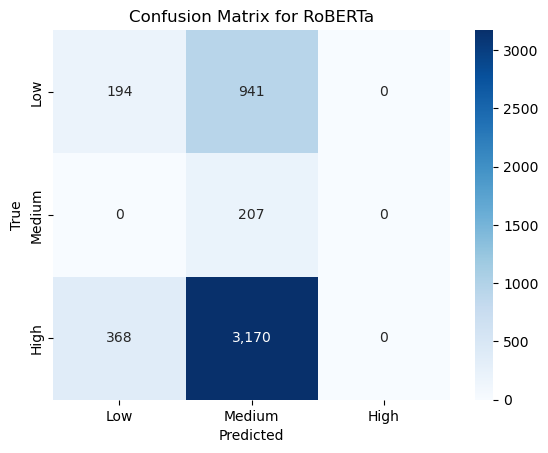

In [67]:
labels = ["Low", "Medium", "High"]

cm = confusion_matrix(df['risk_level'], df['roberta_prediction'])

sns.heatmap(cm, annot=True, fmt=",", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RoBERTa')
plt.show()

In [54]:
print(classification_report(df['risk_level'], df['roberta_prediction']))

              precision    recall  f1-score   support

           0       0.35      0.17      0.23      1135
           1       0.05      1.00      0.09       207
           2       0.00      0.00      0.00      3538

    accuracy                           0.08      4880
   macro avg       0.13      0.39      0.11      4880
weighted avg       0.08      0.08      0.06      4880



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
labels = ["Low", "Medium", "High"]

cm = confusion_matrix(df['risk_level'], df['roberta_prediction'])

sns.heatmap(cm, annot=True, fmt=",", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for DistilBERT')
plt.show()